<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (2)

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 titanic 데이터프레임을 선언하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
- 1-3) PassengerId, Name,Ticket, Cabin 열을 한 번에 제거하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
drop_cols = ['PassengerId', 'Name', 'Ticket','Cabin']
titanic = titanic.drop(drop_cols, axis =1)

2) 상위 5개 행을 확인하세요.

In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 3-1) Age 열 결측치를 Age 열 평균으로 채우세요.
- 3-2) Embarked 열 결측치를 'S'로 채우세요.
- 3-3) 각 열에 결측치가 남아있는지 확인하세요.

In [8]:
titanic_test = titanic.copy()
titanic_test['Age'].fillna( titanic_test['Age'].mean(), inplace = True )
titanic_test['Embarked'].fillna('S', inplace = True)
titanic_test.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
titanic_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 4-1) groupby 메소드를 사용해 Pclass 별 탑승자를 집계하여 tmp 데이터프레임으로 선언하세요.
       탑승자수는 Survived 열 처럼 결측치가 없는 열이 count()fh 집계 가능
- 4-2) tmp 데이터프레임 열 이름이 Pclass, Count가 되게 변경하세요.
- 4-3) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

In [15]:
tmp = titanic_test.groupby(by='Pclass', as_index = False)[['Survived']].count()
tmp.columns['Pclass','Count']
tmp.rename(columns={'Survived':'Count'})
tmp

,Pclass,Survived
0,1,216
1,2,184
2,3,491


<BarContainer object of 3 artists>

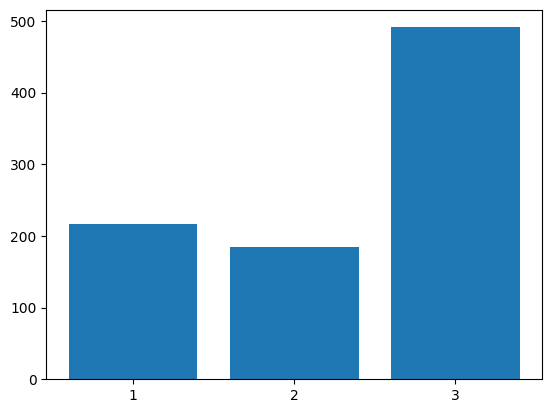

In [19]:
import matplotlib.pyplot as plt

columns=['Pclass','Survived']

plt.bar(x=tmp['Pclass'].astype(str), height = tmp['Survived'])

5) Pclass, Sex, Embarked 열을 한 번에 가변수화하세요. 단, 다중공선성 문제가 없도록 범주값 개수보다 하나 적은 수의 열이 만들어지게 하세요.

In [22]:
dum_cols= ['Pclass', 'Sex','Embarked']
titanic_test = pd.get_dummies(titanic_test, columns = dum_cols,drop_first=True)
titanic_test.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
